# クラスタリングをしてみよう

## 実習の事前準備

In [3]:
# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## データの読み込み

In [4]:
# Irisデータセットの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
# irisのfeature_namesは「sepal length(cm)」のように空白やカッコが付いていて扱いづらいので以下の列名を使用する
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# datasetの作成
dataset = pd.DataFrame(data = iris['data'], columns = feature_names)
dataset['species'] = iris['target']
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## クラスタリングとは

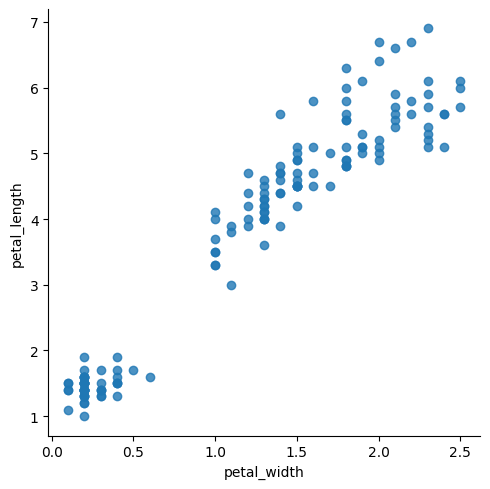

In [6]:
# petal_width と petal_length による散布図
sns.lmplot(x='petal_width', y='petal_length', data=dataset, fit_reg=False)

# k-means法を使ってみよう

In [7]:
# KMeansのimport
from sklearn.cluster import KMeans

In [8]:
# データ（X）：petal_widthとpetal_length
X = np.array(dataset[['petal_width', 'petal_length']])

# 形状を確認
print("X=", X.shape)

X= (150, 2)


In [9]:
# クラスタ数を3としてモデルを作成
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=10)
kmeans_model.fit(X)

KMeans(n_clusters=3, n_init=10)

In [10]:
# クラスタ番号（予測値）を取得
# （補足）kmeans_model.fit_predict(X)：fitとpredictをまとめて実施
Y_pred = kmeans_model.predict(X)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

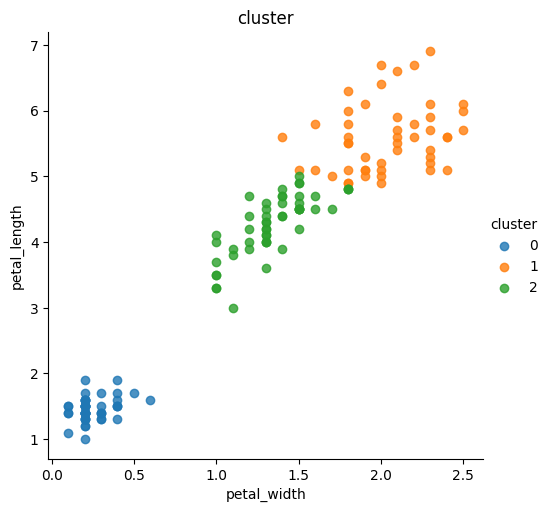

In [11]:
# グラフ化用DataFrameを作成して、tempに格納
temp = dataset[['petal_width', 'petal_length', 'species']].copy()
temp['cluster'] = kmeans_model.labels_

# k-means法によるクラスタリングの結果を描画
ax = sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='cluster', fit_reg=False)
ax.set(title='cluster')

## クラスタリングの評価

## 凝集性（エルボーメソッドのグラフ）

In [12]:
# 各クラスタごとのWCSSを格納するリスト
wcss = []


# クラスタ数のリスト（1から9)
c_list = np.arange(1, 10)


for c in c_list:
     # クラスタ数を c で指定
     kmeans_model = KMeans(n_clusters=c, init='k-means++', n_init=10)
     kmeans_model.fit(X)
      # inertia_プロパティに、WCSSが格納されている
     wcss.append(kmeans_model.inertia_)

In [13]:
wcss

[550.8953333333334,
 86.39021984551397,
 31.371358974358984,
 19.477123363965468,
 14.067949656750573,
 11.06809385232955,
 9.20940873015873,
 7.615402244955954,
 6.571176847662142]

<Axes: >

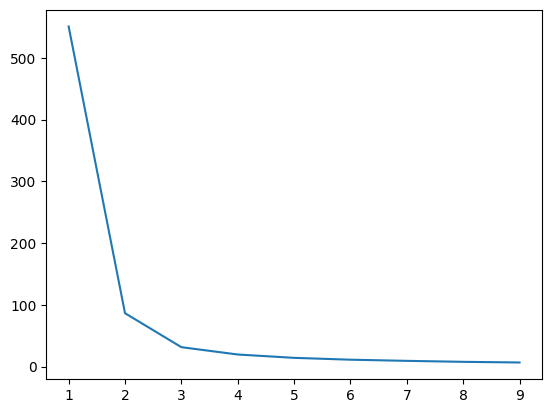

In [14]:
sns.lineplot(x=c_list, y=wcss)

## 凝集性と分離性（シルエットプロットのグラフ）

In [15]:
# 必要なライブラリの追加import
from sklearn.metrics import silhouette_score, silhouette_samples

In [16]:
# クラスタ数の指定
cluster_no = 3

# クラスタリング
kmeans_model = KMeans(n_clusters=cluster_no, init='k-means++', n_init=10)
Y_pred = kmeans_model.fit_predict(X)

In [17]:
# シルエットスコアの平均値
s_average = silhouette_score(X, Y_pred)

# 各データのシルエットスコア
s_score = silhouette_samples(X, Y_pred, metric='euclidean')

NameError: name 'y_lower' is not defined

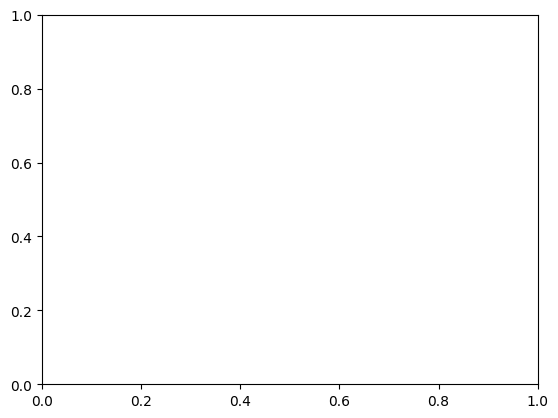

In [18]:
# シルエットプロットを描画
# 参考： https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
y_lowwer = 0


for i in range(cluster_no):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = s_score[Y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    #color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the space between silhouette plots


ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=s_average, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## 混合ガウスモデル

In [ ]:
from sklearn.mixture import GaussianMixture

In [19]:
# クラスタ数を3として混合ガウスモデルを作成
gaussian_model = GaussianMixture(n_components=3, n_init=10)
gaussian_model.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [20]:
# クラスタ番号を取得
Y_pred = gaussian_model.predict(X)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

C:\Users\hsozp\AppData\Local\Temp\ipykernel_25784\632789459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cluster'] = Y_pred


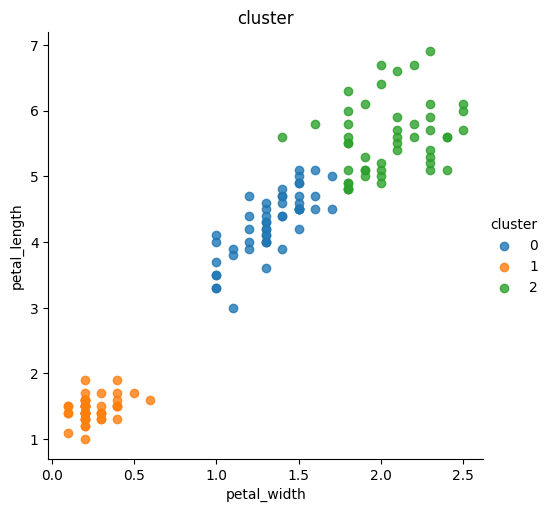

In [21]:
# グラフ化用DataFrameの作成
temp = dataset[['petal_width', 'petal_length', 'species']]
temp['cluster'] = Y_pred

# 混合ガウスモデルによるクラスタリングの結果を描画
ax = sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='cluster', fit_reg=False)
ax.set(title='cluster')

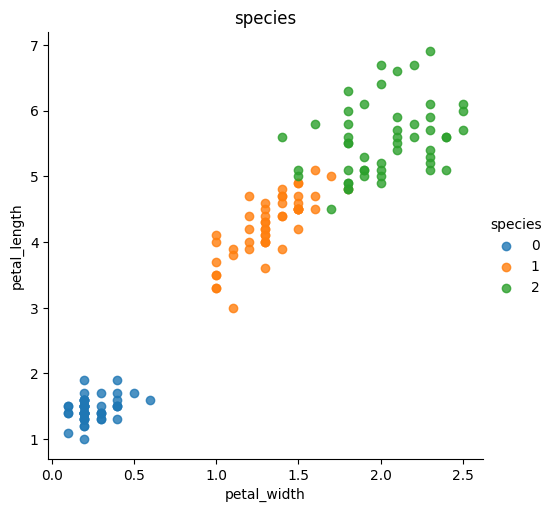

In [22]:
# アヤメの品種を描画
ax = sns.lmplot(x='petal_width', y='petal_length', data=temp, hue='species', fit_reg=False)
ax.set(title='species')

## クラスタリング

In [24]:
# 必要なライブラリの追加import
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
# 総当り距離の計算
dists = pdist(X)
dists.shape

(11175,)

In [26]:
# 150 X 150 の行列の形に変換
dists2 = squareform(dists)
dists2.shape

(150, 150)

<Axes: >

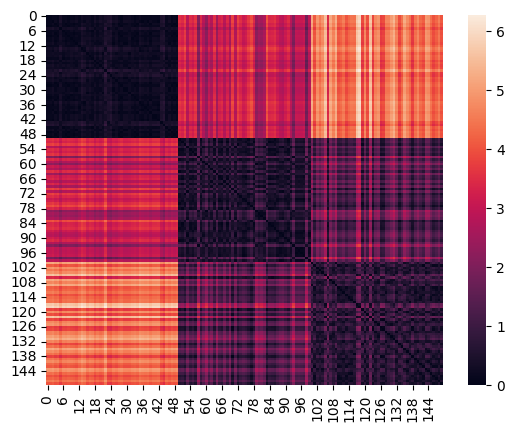

In [27]:
# ヒートマップによる可視化
sns.heatmap(dists2)

In [28]:
# 階層型クラスタリングの実行
Z = linkage(dists, 'ward')

In [29]:
# 0番目の組み合わせ
Z[0]

array([0., 1., 0., 2.])

In [30]:
# ノード番号の確認1
Z[:,0]

array([  0.,   4.,   2.,   3.,   8.,   6.,  10.,  28.,   9.,  27.,  11.,
        12.,  14.,  15.,  40.,  45.,  38.,  42.,  29.,  30.,  46.,  34.,
        39.,  48.,  31.,  33.,  47.,  49.,  57.,  60.,  53.,  89.,  88.,
        94.,  74.,  65.,  51.,  68.,  78.,  84.,  50.,  52.,  70., 138.,
       123., 101., 116., 136.,  55.,  62., 119., 110., 115., 112., 100.,
         5.,  69.,  58.,  85.,  18.,  56., 114.,  76., 146., 103.,  16.,
        95.,  19.,  92.,  54., 149.,  23.,  90.,  83., 132.,  80., 104.,
       125., 111.,  13., 158., 105., 193., 184., 162., 144., 182., 124.,
       121., 148., 165., 122., 143., 170., 108.,  24.,  73., 185.,  77.,
        43., 107.,  81.,  59., 102., 135., 210., 139., 173., 208., 220.,
       177., 191.,  61., 211., 234., 199., 246., 217.,  98.,  64., 118.,
       227., 247., 237., 134., 243., 229., 256., 252., 235., 258., 267.,
       232., 268., 250., 260., 254., 263., 272., 274., 281., 282., 278.,
       286., 270., 288., 291., 295., 290.])

In [31]:
# ノード番号の確認2
Z[:,1]

array([  1., 150.,  36.,   7., 151.,  17., 153., 154.,  32., 156.,  25.,
        37.,  35.,  21.,  41., 155., 152., 166., 160., 168., 169., 159.,
       171., 172., 163., 157., 175., 176.,  93.,  79.,  71., 180.,  99.,
        96.,  97.,  75.,  66., 186., 187., 188.,  63.,  72., 126., 192.,
       127., 142., 137., 140.,  87.,  67., 133., 113., 145., 128., 109.,
        26.,  82.,  91., 106.,  20.,  86., 141., 190., 195., 196., 164.,
       183., 174., 181., 189., 213., 205., 198., 200., 203., 206., 120.,
       130., 147.,  22., 161., 117., 194., 216., 167., 197., 218., 224.,
       201., 202., 215., 231., 226., 209., 129.,  44., 207., 222., 223.,
       221., 131., 179., 236., 242., 204., 212., 228., 230., 219., 238.,
       257., 248., 233., 239., 240., 225., 255., 249., 178., 251., 241.,
       244., 262., 253., 214., 245., 264., 259., 265., 273., 266., 275.,
       261., 269., 271., 276., 279., 277., 280., 284., 285., 287., 283.,
       289., 293., 292., 294., 296., 297.])

In [32]:
# ノード番号が150以上となる組み合わせの例
Z[108]

array([208.        , 219.        ,   0.26140645,   8.        ])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [45.0, 45.0, 62.5, 62.5],
  [13.75, 13.75, 53.75, 53.75],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [85.0, 85.0, 103.75, 103.75],
  [135.0, 135.0, 145.0, 145.0],
  [94.375, 94.375, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [117.1875, 117.1875, 160.0, 160.0],
  [33.75, 33.75, 138.59375, 138.59375],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [195.0, 195.0, 214.375, 214.375],
  [185.0, 185.0, 204.6875, 204.6875],
  [175.0, 175.0, 194.84375, 194.84375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [275.0, 275.0, 293.75, 293.75],
  [265.0, 265.0, 284.375, 284.375],
  [255.0, 255.0, 274.6875, 274.6875],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 

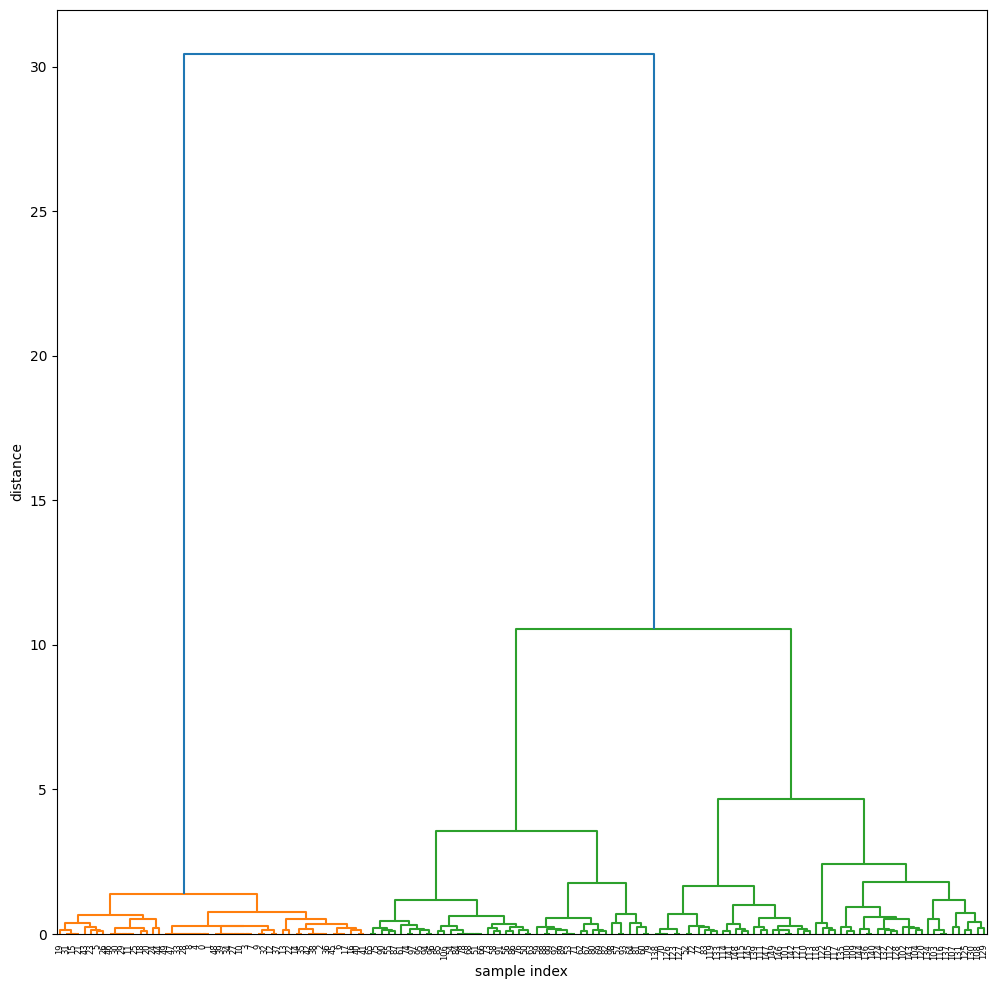

In [33]:
# グラフの大きさを指定
fig = plt.figure(figsize=(12, 12))

# X軸とY軸のラベルを指定
plt.xlabel('sample index')
plt.ylabel('distance')

# デンドログラムの作成
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=6.,
)